In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [34]:
df = pd.read_csv("../Dataset/Movie_classification.csv", header = 0)

In [35]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


<b>Missing value imputation </b>

In [37]:
df['Time_taken'].mean()

157.39149797570855

In [38]:
df['Time_taken'].fillna(df['Time_taken'].mean(), inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


<b>Dummy variable Creation</b>

In [40]:
df = pd.get_dummies(df, columns = ['3D_available','Genre'], drop_first = True)

In [41]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


<b>Splitting into train and test</b>

In [42]:
X = df.loc[:, df.columns!='Start_Tech_Oscar']

In [43]:
y = df['Start_Tech_Oscar']

In [44]:
X.shape

(506, 20)

In [45]:
y.shape

(506,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

<b>Training the classifier</b>

In [47]:
from sklearn import tree
cls = tree.DecisionTreeClassifier(max_depth = 3)

In [48]:
cls.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<b>Predicting the values using trained model</b>

In [49]:
y_train_pred = cls.predict(X_train)
y_test_pred = cls.predict(X_test)

In [50]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

<b>Model performance</b>

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [54]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

<b>Plotting decision tree</b><br/> note: Convert the dot file to png online or through pydotplus, I was facing some problem with the pydotplus library, so i did it online

In [55]:
dot = tree.export_graphviz(cls, out_file='ctree.dot',feature_names= X_train.columns, filled = True)

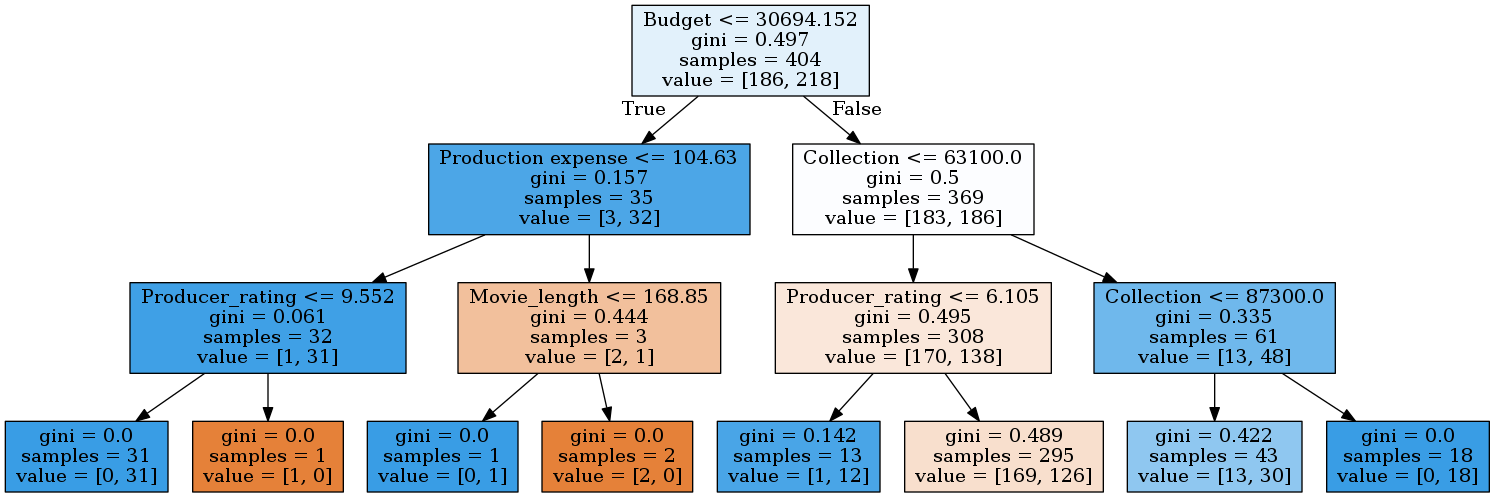

In [56]:
from IPython.core.display import Image
Image( filename ='ctree.png')

<b>Controlling tree growth</b>

In [57]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf= 20, max_depth=4)
clftree2.fit(X_train,y_train)
dot = tree.export_graphviz(clftree2, out_file='ctree1.dot',feature_names= X_train.columns, filled = True)

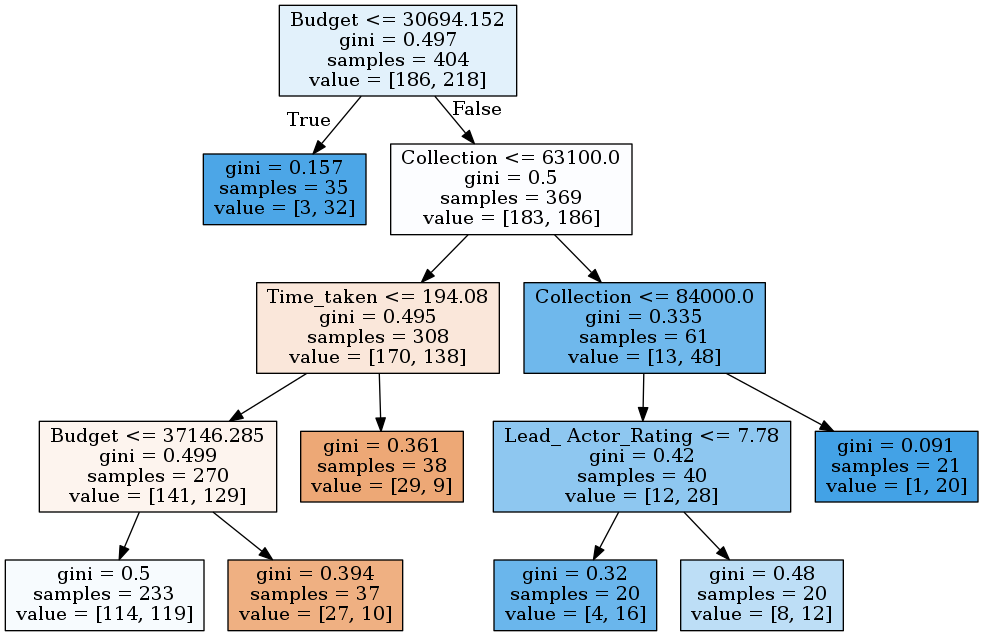

In [58]:
from IPython.core.display import Image
Image( filename ='ctree1.png')

In [59]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647